In [16]:
!pip install mplfinance

In [17]:
import numpy as np
import pandas as pd
import copy
import time
import datetime as dt
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import mplfinance as mpf

In [18]:
def ADX(DF,n=20):
    df=DF.copy()
    df["ATR"]=ATR(df,n)
    df["upmove"]=df["High"]-df["High"].shift(1)
    df["downmove"]=df["Low"].shift(1)-df["Low"]
    df["+dm"]=np.where( (df["upmove"]>df["downmove"]) & (df["upmove"]>0),df["upmove"],0)
    df["-dm"]=np.where( (df["downmove"]>df["upmove"]) & (df["downmove"]>0),df["downmove"],0)
    df["+di"]=100*(df["+dm"]/df["ATR"]).ewm(span=n,min_periods=n).mean()
    df["-di"]=100*(df["-dm"]/df["ATR"]).ewm(span=n,min_periods=n).mean()
    df["ADX"]=100*abs((df["+di"]-df["-di"])/(df["+di"]+df["-di"])).ewm(span=n,min_periods=n).mean()
    return df["ADX"]

In [19]:
def ATR(DF,n=14):
    df=DF.copy()
    df["H-L"]=df["High"]-df["Low"]
    df["H-PC"]=df["High"]-df["Adj Close"].shift(1)
    df["L-PC"]=df["Low"]-df["Adj Close"].shift(1)
    df["TR"]=df[["H-L","H-PC","L-PC"]].max(axis=1,skipna=False)
    df["ATR"]=df["TR"].ewm(com=n,min_periods=n).mean()
    return df["ATR"]

In [20]:
# download the data
ticker="SPY"
spy=yf.download(ticker,period='60d',interval='5m')

[*********************100%***********************]  1 of 1 completed


In [24]:
df_adx=ADX(spy)

In [25]:
type(df_adx)

pandas.core.series.Series

In [28]:
df_adx=df_adx.to_frame()

In [36]:
df=pd.concat([spy,df_adx],axis=1)
df

,Open,High,Low,Close,Adj Close,Volume,ADX
Datetime,,,,,,,
2022-06-28 09:30:00-04:00,390.230011,392.880005,390.140015,392.579987,392.579987,3544636,NaN
2022-06-28 09:35:00-04:00,392.670013,393.160004,392.329987,392.724213,392.724213,1412036,NaN
2022-06-28 09:40:00-04:00,392.724213,392.980011,392.200012,392.640991,392.640991,1109705,NaN
2022-06-28 09:45:00-04:00,392.630005,392.770111,391.899994,392.720001,392.720001,982399,NaN
2022-06-28 09:50:00-04:00,392.690002,392.929993,392.410004,392.670013,392.670013,847901,NaN
...,...,...,...,...,...,...,...
2022-09-21 15:40:00-04:00,379.609985,380.230011,378.959991,378.980011,378.980011,2757458,24.655663
2022-09-21 15:45:00-04:00,378.980011,379.109985,378.250000,378.640015,378.640015,2835169,26.192519
2022-09-21 15:50:00-04:00,378.630005,379.500000,378.480011,378.940002,378.940002,3427721,27.115126


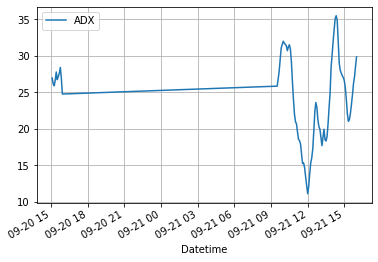

In [58]:
df_adx[-90:].plot()
plt.grid()

<AxesSubplot:ylabel='ADX'>

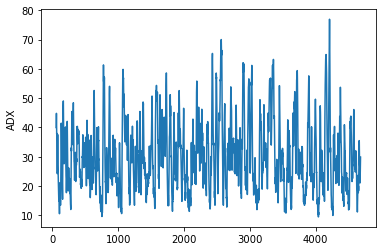

In [53]:
import seaborn as sns
sns.lineplot(x=range(len(df["ADX"])),y='ADX',data=df_adx)

In [38]:
type(df_adx)

pandas.core.frame.DataFrame

In [68]:
mpf.plot(df_adx,show_nontrading=False)

/Users/bikenkc/opt/anaconda3/lib/python3.9/site-packages/mplfinance/_arg_validators.py:36: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


KeyError: 'Open'

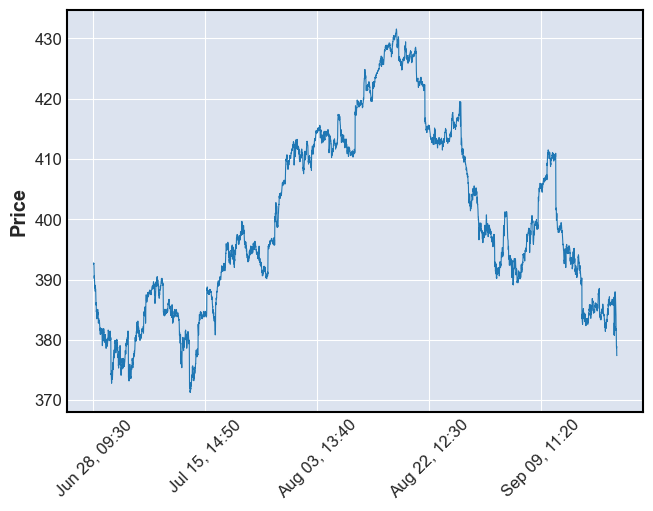

In [60]:
mpf.plot(data=spy,type='line',volume=False,show_nontrading=False)

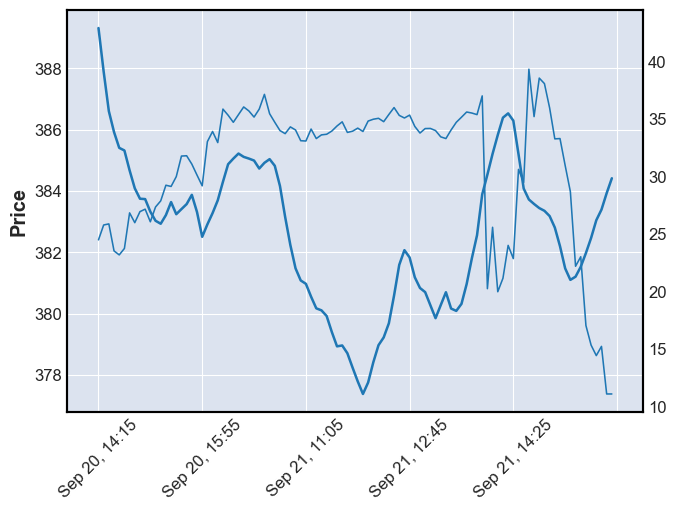

In [86]:
roll_max_plot=mpf.make_addplot(df_adx[-100:])
mpf.plot(data=spy[-100:],type='line',volume=False,show_nontrading=False,addplot=roll_max_plot)


In [74]:
def WMA(DF,n=7):
    df=DF.copy()
    weights=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7])
    df["WMA"]=df['Adj Close'].rolling(7).apply(lambda x:np.sum(weights*x)/np.sum(weights))
    return df["WMA"]

In [75]:
WMA(spy)

Datetime
2022-06-28 09:30:00-04:00           NaN
2022-06-28 09:35:00-04:00           NaN
2022-06-28 09:40:00-04:00           NaN
2022-06-28 09:45:00-04:00           NaN
2022-06-28 09:50:00-04:00           NaN
                                ...    
2022-09-21 15:40:00-04:00    381.192497
2022-09-21 15:45:00-04:00    380.262145
2022-09-21 15:50:00-04:00    379.659289
2022-09-21 15:55:00-04:00    378.879292
2022-09-21 16:00:00-04:00    378.334652
Name: WMA, Length: 4681, dtype: float64